In [61]:
import numpy as np
import sympy as smp
import scipy
from scipy import constants
from sympy.plotting import plot
from matplotlib import style

x = smp.Symbol('x')
z = smp.Symbol('z')

L, ZL, w = 1, 1, 0.2

### Plotting $\epsilon(z)$ using Numerical ODE for double pole LPF $\frac1{(s+1)^2}\leftrightarrow ze^{-z}$

In [62]:
Gamma = smp.exp(-10j*z)
Gamma

exp(-10.0*I*z)

In [63]:
a = -2 *  smp.diff(Gamma) * 1/(1-(Gamma)**2)
a

20.0*I*exp(-10.0*I*z)/(1 - exp(-20.0*I*z))

In [64]:
b = 4*1j*w*smp.sqrt(constants.mu_0) * Gamma * 1/(1-(Gamma)**2)
b

0.000896798594867766*I*exp(-10.0*I*z)/(1 - exp(-20.0*I*z))

Extract $\xi\to y$
$$y'(z)+a(z)y(z)+b(z)y^2(z)=0$$

In [65]:
y = smp.Function("y")(z)
y

y(z)

`y.diff()`  
`y.integrate()`

In [66]:
diff_eq = smp.Eq(a*y.diff(z)+a*y+b*y**2, 0)
diff_eq

Eq(0.000896798594867766*I*y(z)**2*exp(-10.0*I*z)/(1 - exp(-20.0*I*z)) + 20.0*I*y(z)*exp(-10.0*I*z)/(1 - exp(-20.0*I*z)) + 20.0*I*exp(-10.0*I*z)*Derivative(y(z), z)/(1 - exp(-20.0*I*z)), 0)

In [67]:
sol = smp.dsolve(diff_eq, y)
sol

Eq(y(z), -22301.5514458394*C1/(C1 - exp(z)))

In [68]:
exp = sol.rhs
exp

-22301.5514458394*C1/(C1 - exp(z))

In [69]:
ics = {y.subs(z, L): smp.sqrt(constants.mu_0)/ZL}       # initial conditions
ics

{y(1): 0.00112099824358471}

In [70]:
ivp = smp.dsolve(diff_eq, ics=ics)
ivp

Eq(y(z), -0.0030471890021024/(1.36635740769097e-7 - exp(z)))

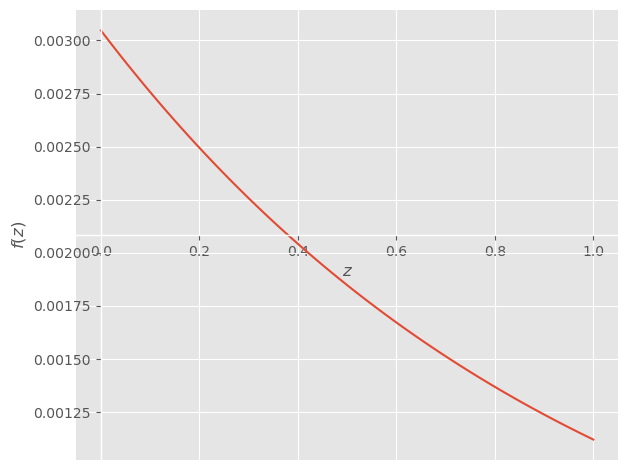

In [71]:
p1 = plot(ivp.rhs, (z, 0, L))

### Solving using the Analytic expression I derived

In [72]:
v = smp.Function("v")(z)
v

v(z)

In [78]:
Gamma = smp.exp(-10j*x)
a = -2 *  smp.diff(Gamma) * 1/(1-(Gamma)**2)
b = 4*1j*w*smp.sqrt(constants.mu_0) * Gamma * 1/(1-(Gamma)**2)

In [79]:
I = smp.Function("I")(x)
I

I(x)

In [82]:
I = smp.exp(-1 * smp.integrate(a, x))
I

(1.0 + exp(-10.0*I*x))**1.0/(-1.0 + exp(-10.0*I*x))**1.0

In [83]:
def_I = smp.Function("def_I")(x)
def_I

def_I(x)

In [85]:
def_I = smp.integrate(I * b, (x, L, z))
def_I

0.000896798594867766*I*Integral((1 + exp(-10.0*I*x))**1.0*exp(10.0*I*x)/((-1 + exp(-10.0*I*x))**1.0*exp(20.0*I*x) - (-1 + exp(-10.0*I*x))**1.0), (x, 1, z))

Since `Sympy` is incapable of solving the given integral, we use the subordinate ODE to check the expression

In [86]:
diff_eq = smp.Eq(a*v.diff(z)-a*v, b)
diff_eq

Eq(-20.0*I*v(z)*exp(-10.0*I*x)/(1 - exp(-20.0*I*x)) + 20.0*I*exp(-10.0*I*x)*Derivative(v(z), z)/(1 - exp(-20.0*I*x)), 0.000896798594867766*I*exp(-10.0*I*x)/(1 - exp(-20.0*I*x)))

In [97]:
ics = {v.subs(z, L): ZL/smp.sqrt(constants.mu_0)}       # initial conditions
ics

{v(1): 892.062057833577}

In [98]:
ivp = smp.dsolve(diff_eq, ics=ics)
ivp

Eq(v(z), 328.171307821751*exp(z) - 4.48399297433883e-5)

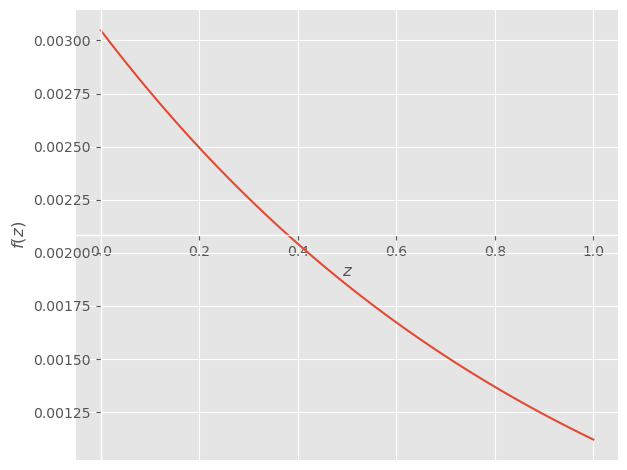

In [99]:
p1 = plot((ivp.rhs)**(-1), (z, 0, L))

### Checking the Expression obtained for $v(z)$ ODE

In [100]:
a = smp.Function("a")(z)
a

a(z)

In [101]:
b = smp.Function("b")(z)
b

b(z)

In [103]:
diff_eq = smp.Eq(v.diff(z)-a*v, b)
diff_eq

Eq(-a(z)*v(z) + Derivative(v(z), z), b(z))

In [104]:
sol = smp.dsolve(diff_eq, v)
sol

Eq(v(z), (C1 + Integral(b(z)*exp(-Integral(a(z), z)), z) + Integral(a(z)*v(z)*exp(-Integral(a(z), z)), z))*exp(Integral(a(z), z))/(exp(Integral(a(z), z))*Integral(a(z)*exp(-Integral(a(z), z)), z) + 1))